<a href="https://colab.research.google.com/github/yasheshgupta/Hotel-Booking-Data-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project_yashesh_gupta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [127]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as mtick

In [129]:
path='/content/drive/MyDrive/Capstone Project hotel booking  data analysis (yashesh gupta)/Hotel Bookings.csv'
df=pd.read_csv(path)

In [130]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [131]:
df.tail(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119380,City Hotel,0,44,2017,August,35,31,1,3,2,0.0,0,SC,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,140.75,0,1,Check-Out,2017-09-04
119381,City Hotel,0,188,2017,August,35,31,2,3,2,0.0,0,BB,DEU,Direct,Direct,0,0,0,A,A,0,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,2017-09-05
119382,City Hotel,0,135,2017,August,35,30,2,4,3,0.0,0,BB,JPN,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,2017-09-05
119383,City Hotel,0,164,2017,August,35,31,2,4,2,0.0,0,BB,DEU,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,2017-09-06
119384,City Hotel,0,21,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [133]:
#drop the column
df=df.drop(['company','agent'], axis=1)

In [134]:
# We delete rows with empty cells
df=df.dropna(axis=0)

In [135]:
#check missing value
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [136]:
#merge ‘children’ and ‘babies’ columns into ‘kids’ column.
df['kids']= df.children + df.babies

In [137]:
# create a column for 'Total_member'
df['Total_member']= df.kids + df.adults

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

In [139]:
#convert the datatypes to string
df['arrival_date_year'] = df['arrival_date_year'].astype('str')
df['arrival_date_month'] = df['arrival_date_month'].astype('str')
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype('str')
df['is_canceled'] = df['is_canceled'].astype('str')
df['is_repeated_guest'] = df['is_repeated_guest'].astype('str')

In [140]:
#create a new column of 'arrival_date'
df['arrival_date'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str)
df['arrival_date'] = df['arrival_date'].apply(pd.to_datetime)
df['reservation_status_date'] = df['reservation_status_date'].apply(pd.to_datetime)

In [141]:
cancelled_data = df[df['reservation_status'] == 'Canceled']
cancelled_data['canc_to_arrival_days'] = cancelled_data['arrival_date'] - cancelled_data['reservation_status_date']
cancelled_data['canc_to_arrival_days'] = cancelled_data['canc_to_arrival_days'].dt.days

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [142]:
# Statistical aspects of the hotel dataframe
df.describe()

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,kids,Total_member
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,104.311435,27.166555,0.928897,2.502145,1.858391,0.104207,0.007948,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,0.112155,1.970546
std,106.903309,13.589971,0.996216,1.900168,0.578576,0.399172,0.097380,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,0.413155,0.721894
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,16.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000,2.000000
50%,69.000000,28.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,2.000000
75%,161.000000,38.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,0.000000,2.000000
max,737.000000,53.000000,16.000000,41.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,10.000000,55.000000


Basic Data Analysis on Bookings

In [143]:
#confirmed booking per month
print('no of booking in month')
month_booking=df.arrival_date_month.value_counts()
print(month_booking)

no of booking in month
August       13852
July         12628
May          11779
October      11095
April        11045
June         10927
September    10467
March         9739
February      8012
November      6752
December      6728
January       5874
Name: arrival_date_month, dtype: int64


Text(0.5, 0, 'Month')

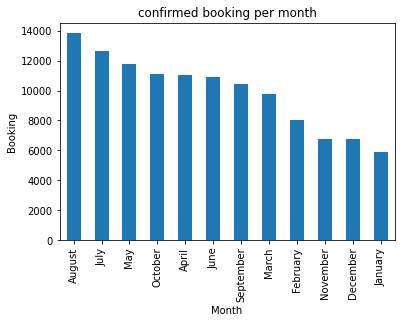

In [144]:
month_booking.plot(kind='bar')
plt.title('confirmed booking per month')
plt.ylabel('Booking')
plt.xlabel('Month')

In [145]:
# customer most prefferd hotel
hotel_preferred=df.hotel.value_counts()
hotel_preferred

City Hotel      79302
Resort Hotel    39596
Name: hotel, dtype: int64

Text(0.5, 0, 'Type of hotel')

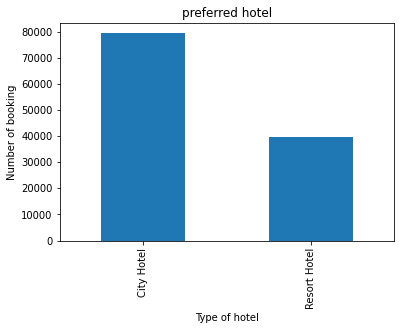

In [146]:
hotel_preferred.plot(kind='bar')
plt.title('preferred hotel')
plt.ylabel('Number of booking')
plt.xlabel('Type of hotel')

In [147]:
# customer most prefferd hotel percentage
hotel_percentage=df.hotel.value_counts(normalize=True)
hotel_percentage

City Hotel      0.666975
Resort Hotel    0.333025
Name: hotel, dtype: float64

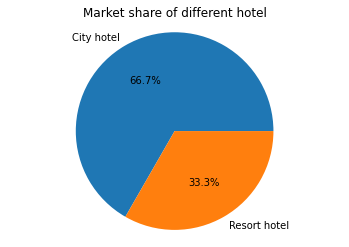

In [148]:
my_labels= 'City hotel','Resort hotel'
plt.pie(hotel_percentage,labels=my_labels,autopct='%1.1f%%')
plt.title('Market share of different hotel')
plt.axis('equal')
plt.show()

In [149]:
#Top ten country booking 
country_booking = df.country.value_counts().head(10)
country_booking

PRT    48586
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

Text(0.5, 0, 'Country')

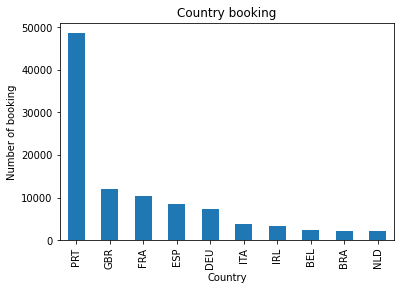

In [150]:
country_booking.plot(kind='bar')
plt.title('Country booking')
plt.ylabel('Number of booking')
plt.xlabel('Country')

In [151]:
# Monthly booking of different hotel
month_booking=df.groupby(['arrival_date_month','hotel'])['hotel'].count().unstack()
month_booking


hotel,City Hotel,Resort Hotel
arrival_date_month,,
April,7476,3569
August,8979,4873
December,4129,2599
February,4965,3047
January,3736,2138
July,8088,4540
June,7894,3033
March,6458,3281
May,8232,3547


Text(0.5, 0, 'month')

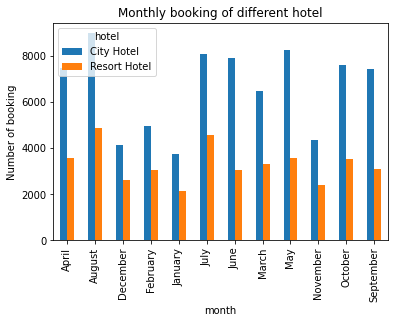

In [152]:
#Variation of hotel bookings on their type and across the Month
month_booking.plot(kind='bar')
plt.title('Monthly booking of different hotel')
plt.ylabel('Number of booking')
plt.xlabel('month')

In [153]:
# Yearly booking of different hotel
yearly_hotel_booking=df.groupby(['arrival_date_year','hotel'])['hotel'].count().unstack()
yearly_hotel_booking

hotel,City Hotel,Resort Hotel
arrival_date_year,,
2015,13663,8196
2016,38135,18300
2017,27504,13100


Text(0, 0.5, 'Number of booking')

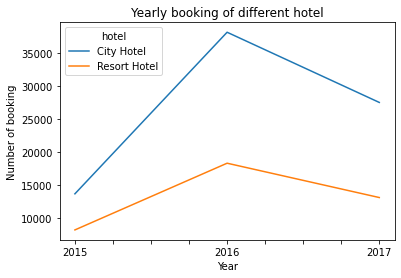

In [154]:
yearly_hotel_booking.plot()
plt.title('Yearly booking of different hotel')
plt.xlabel('Year')
plt.ylabel('Number of booking')

What are the percentage of cancellations in hotels? Which Hotel has the highest percentage of cancellations?


In [155]:
#hotel is canceled the booking
 # 0 = is_not cancel and 1 = is_cancelled
cancel = df[df['is_canceled']=='1']
cancel_booking=cancel.groupby(['hotel','is_canceled'])['is_canceled'].count()
cancel_booking

hotel         is_canceled
City Hotel    1              33076
Resort Hotel  1              11077
Name: is_canceled, dtype: int64

Text(0.5, 0, 'Hotel')

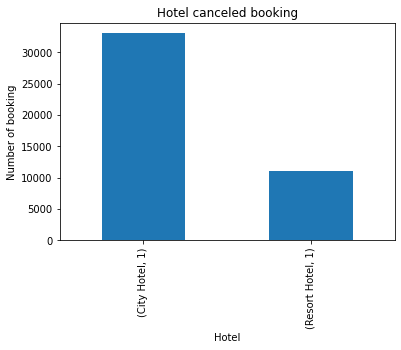

In [156]:
cancel_booking.plot(kind='bar')
plt.title('Hotel canceled booking')
plt.ylabel('Number of booking')
plt.xlabel('Hotel')

In [157]:
# The booking and cancelled status of different hotel
df_booking_cancel=df.groupby(['hotel','is_canceled'])['is_canceled'].count().unstack()
df_booking_cancel

is_canceled,0,1
hotel,,
City Hotel,46226,33076
Resort Hotel,28519,11077


Text(0, 0.5, 'count')

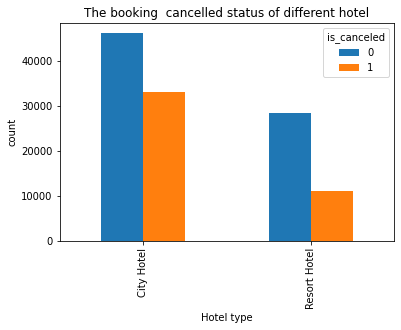

In [158]:
df_booking_cancel.plot(kind='bar')
plt.title('The booking  cancelled status of different hotel')
plt.xlabel('Hotel type')
plt.ylabel('count')

In [159]:
#Percentage of booking and cancel of booking in resort hotel
resort_hotel=df[df['hotel']=='Resort Hotel']
resort_hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids,Total_member,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.0,2.0,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.0,2.0,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,0.0,1.0,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,0.0,1.0,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,0.0,2.0,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,1.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,0,Transient,89.75,0,0,Check-Out,2017-09-10,1.0,3.0,2017-08-31
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,0.0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10,0.0,2.0,2017-08-30
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,0.0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,0,Transient,153.57,0,3,Check-Out,2017-09-12,0.0,2.0,2017-08-29
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,0,Contract,112.80,0,1,Check-Out,2017-09-14,0.0,2.0,2017-08-31


In [160]:
resort_booking=resort_hotel.is_canceled.value_counts(normalize=True)
resort_booking

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [161]:
resort_hotel.is_canceled.value_counts()

0    28519
1    11077
Name: is_canceled, dtype: int64

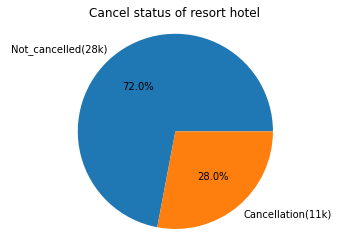

In [162]:
my_labels= 'Not_cancelled(28k)','Cancellation(11k)'
plt.pie(resort_booking,labels=my_labels,autopct='%1.1f%%')
plt.title('Cancel status of resort hotel')
plt.axis('equal')
plt.show()

In [163]:
city_hotel = df[df['hotel']=='City Hotel']
city_hotel.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids,Total_member,arrival_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-03,0.0,1.0,2015-07-01
40061,City Hotel,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,76.50,0,1,Canceled,2015-07-01,0.0,2.0,2015-07-01
40062,City Hotel,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,68.00,0,1,Canceled,2015-04-30,0.0,1.0,2015-07-01
40063,City Hotel,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,76.50,0,2,Canceled,2015-06-23,0.0,2.0,2015-07-01
40064,City Hotel,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,76.50,0,1,Canceled,2015-04-02,0.0,2.0,2015-07-02
40065,City Hotel,1,79,2015,July,27,2,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,76.50,0,1,Canceled,2015-06-25,0.0,2.0,2015-07-02
40066,City Hotel,0,3,2015,July,27,2,0,3,1,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,0,Transient-Party,58.67,0,0,Check-Out,2015-07-05,0.0,1.0,2015-07-02
40067,City Hotel,1,63,2015,July,27,2,1,3,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,68.00,0,0,Canceled,2015-06-25,0.0,1.0,2015-07-02
40068,City Hotel,1,62,2015,July,27,2,2,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,76.50,0,1,No-Show,2015-07-02,0.0,2.0,2015-07-02
40069,City Hotel,1,62,2015,July,27,2,2,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,76.50,0,1,No-Show,2015-07-02,0.0,2.0,2015-07-02


In [164]:
#Percentage of booking and cancel of booking in City hotel
city_hotel_booking= city_hotel.is_canceled.value_counts(normalize=True)
city_hotel_booking

0    0.582911
1    0.417089
Name: is_canceled, dtype: float64

In [165]:
city_hotel.is_canceled.value_counts()

0    46226
1    33076
Name: is_canceled, dtype: int64

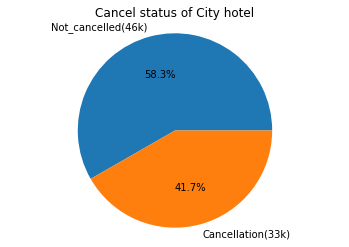

In [166]:
my_labels= 'Not_cancelled(46k)','Cancellation(33k)'
plt.pie(city_hotel_booking,labels=my_labels,autopct='%1.1f%%')
plt.title('Cancel status of City hotel')
plt.axis('equal')
plt.show()

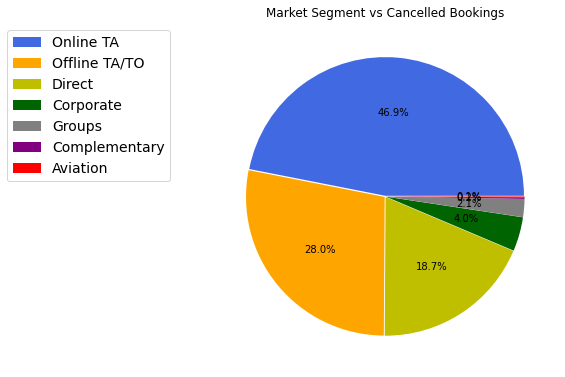

In [167]:
# Different market segment with cancelled booking percentage 

plt.figure(figsize=(8,8))
explode = [0.005] * len(cancelled_data['market_segment'].unique())
colors = ['royalblue','orange','y','darkgreen','gray','purple','red','lightblue']
plt.pie(cancelled_data['market_segment'].value_counts(),
       autopct = '%.1f%%',
       explode = explode,
       colors = colors)
plt.legend(cancelled_data['market_segment'].unique(), bbox_to_anchor=(-0.1, 1.),
           fontsize=14)
plt.title('Market Segment vs Cancelled Bookings')
plt.tight_layout()
plt.show()

In [168]:
  #which market segment this most preferred for booking
booking_market = df.market_segment.value_counts()
booking_market

Online TA        56402
Offline TA/TO    24160
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

Text(0.5, 0, 'Market segment')

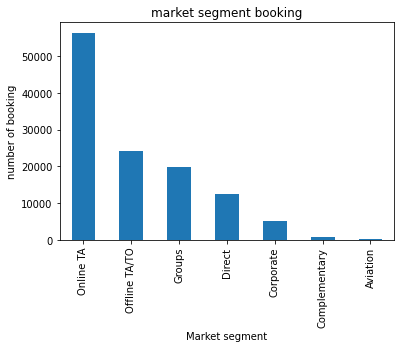

In [169]:
booking_market.plot(kind='bar')
plt.title('market segment booking')
plt.ylabel('number of booking')
plt.xlabel('Market segment')

** Distribution of ADR values :**

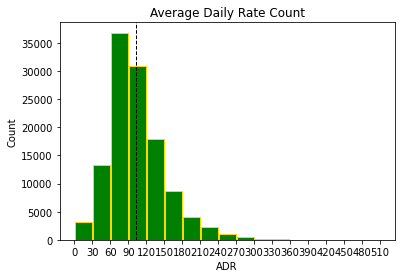

In [170]:
bins=[i for i in range(0,520,30)]
plt.hist(df['adr'],bins,rwidth=.95,color='green',ec='gold')
plt.xticks(bins)
plt.xlabel("ADR")
plt.ylabel("Count")
plt.title("Average Daily Rate Count")
plt.axvline(df['adr'].mean(), color='k', linestyle='dashed', linewidth=1)
print()


 Hotel Types Average adr

In [171]:
avg_hotel_adr=df.groupby(['hotel'])['adr'].mean()
avg_hotel_adr


hotel
City Hotel      105.326470
Resort Hotel     95.347555
Name: adr, dtype: float64

Text(0.5, 1.0, ' Average ADR Of Hotel Types')

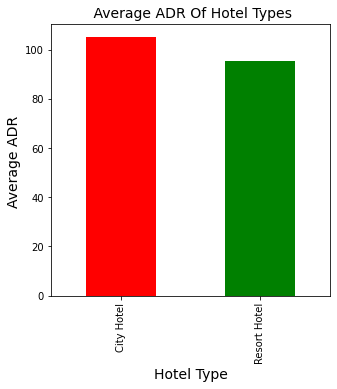

In [172]:
avg_hotel_adr.plot(kind='bar', figsize=(5,5),color=['r','g'])
plt.xlabel('Hotel Type',fontsize=14)
plt.ylabel("Average ADR ",fontsize=14)
plt.title(' Average ADR Of Hotel Types',fontsize=14)


 **AVG ADR OF Number Of Members Stays Together At A Hotel **

In [173]:
df.Total_member.unique()

array([ 2.,  1.,  3.,  4.,  5., 12., 40., 26., 50., 27., 55.,  0., 20.,
        6., 10.])

In [174]:
adr_Total_Member=df.groupby(["hotel","Total_member"])['adr'].mean()
adr_Total_Member


hotel         Total_member
City Hotel    0.0              11.661447
              1.0              93.519755
              2.0             100.342761
              3.0             143.404100
              4.0             192.222452
              5.0             240.229130
              10.0             95.000000
              12.0             84.450000
Resort Hotel  0.0               2.545455
              1.0              55.451507
              2.0              93.666894
              3.0             144.953760
              4.0             181.109782
              5.0             155.415778
              6.0               0.000000
              10.0              0.000000
              12.0            133.160000
              20.0              0.000000
              26.0              0.000000
              27.0              0.000000
              40.0              0.000000
              50.0              0.000000
              55.0              0.000000
Name: adr, dtype: float64

Text(0.5, 1.0, ' AVG ADR OF Number Of Members Stays Together At A Hotel ')

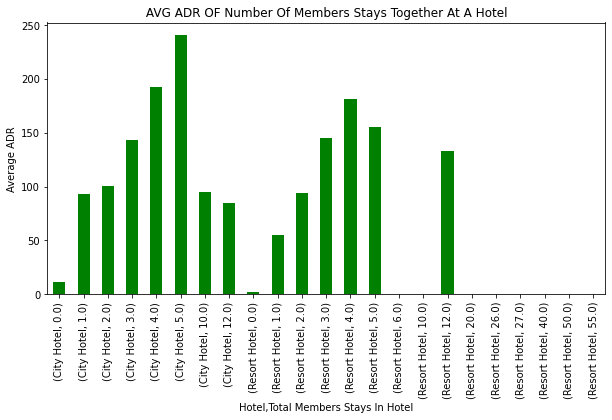

In [175]:
adr_Total_Member.plot(kind="bar",figsize=(10,5),color="g")
plt.xlabel('Hotel,Total Members Stays In Hotel')
plt.ylabel("Average ADR")
plt.title(' AVG ADR OF Number Of Members Stays Together At A Hotel ')


**Top 10 Countries Having Best Average ADR**

In [176]:
hotel_country_adr=df.groupby(["country"])["adr"].mean()
hotel_country_adr=hotel_country_adr.sort_values()[-11:-1]
hotel_country_adr

country
PHL    154.355750
FRO    155.200000
COM    165.305000
GEO    169.015909
NCL    175.500000
MYT    177.750000
LAO    181.665000
UMI    200.000000
AND    202.652857
AIA    265.000000
Name: adr, dtype: float64

Text(0.5, 1.0, 'Top 10 Countries Having Best Average ADR')

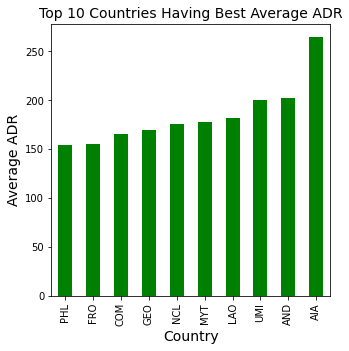

In [177]:
#top 5 counteries having top adr values 
hotel_country_adr.plot(kind='bar', figsize=(5,5),color=['g'])
plt.xlabel('Country',fontsize=14)
plt.ylabel("Average ADR",fontsize=14)
plt.title('Top 10 Countries Having Best Average ADR',fontsize=14)


**AVG ADR Of Month And Year**

In [178]:
adr_month_year=df.groupby(['arrival_date_month','arrival_date_year'])['adr'].mean()
adr_month_year

arrival_date_month  arrival_date_year
April               2016                  89.123242
                    2017                 111.583118
August              2015                 105.856597
                    2016                 142.853676
                    2017                 164.248370
December            2015                  74.304034
                    2016                  86.560643
February            2016                  70.402712
                    2017                  76.982664
January             2016                  65.155842
                    2017                  73.949962
July                2015                  97.850503
                    2016                 125.489521
                    2017                 143.037770
June                2016                 107.039195
                    2017                 125.757599
March               2016                  79.360278
                    2017                  82.399721
May                 2016  

Text(0.5, 1.0, ' AVG ADR Of Month And Year')

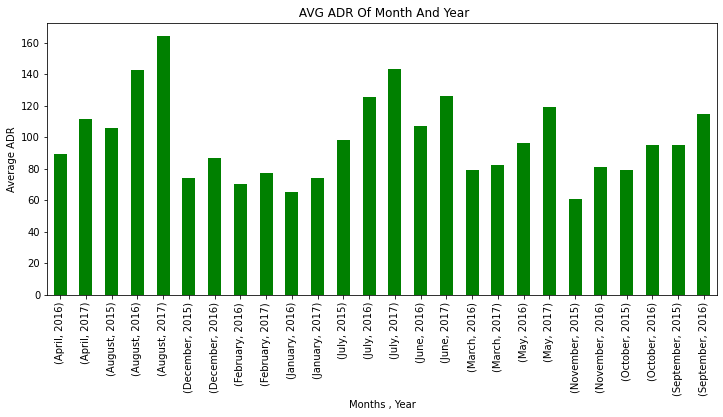

In [179]:
adr_month_year.plot(kind='bar', figsize=(12,5), color=['g'])
plt.xlabel('Months , Year')
plt.ylabel("Average ADR")
plt.title(' AVG ADR Of Month And Year')


Meal Analysis 

In [180]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [181]:
meal_count=df['meal'].value_counts()
meal_count

BB           91863
HB           14434
SC           10638
Undefined     1165
FB             798
Name: meal, dtype: int64

Text(0.5, 1.0, 'Meal Vs Meal Count')

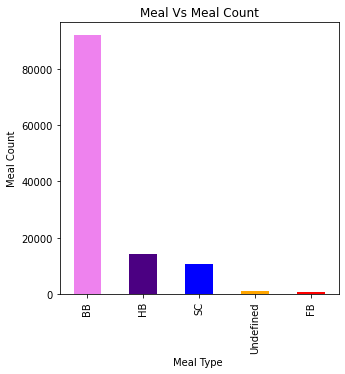

In [182]:
meal_count.plot(kind='bar', figsize=(5,5), color=['violet','indigo','blue','orange','red'])
plt.xlabel('Meal Type ')
plt.ylabel("Meal Count")
plt.title('Meal Vs Meal Count')

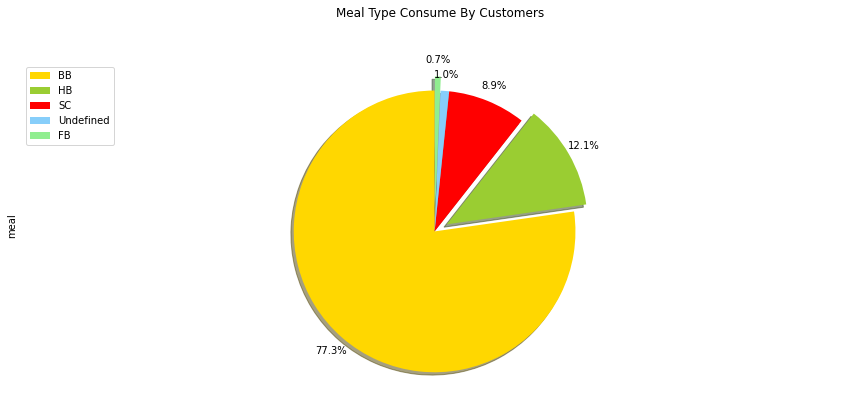

In [183]:
#ploting bar graph for meal analysis
colors_list = ['gold', 'yellowgreen', 'red', 'lightskyblue', 'lightgreen']
explode_list = [0.0, 0.1, 0.0, 0, 0.1] # ratio for each continent with which to offset each wedge.

meal_count.plot(kind='pie',
                            
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Meal Type Consume By Customers', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=meal_count.index, loc='upper left') 

plt.show()

In [184]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'kids', 'Total_member',
       'arrival_date'],
      dtype='object')

In [185]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids,Total_member,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2.0,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2.0,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0,1.0,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0,1.0,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,0.0,2.0,2015-07-01


 Car parking space analysis


In [186]:
df_carparking_space=df['required_car_parking_spaces'].value_counts()
df_carparking_space

0    111588
1      7277
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

Text(0.5, 1.0, 'Number Of Hotels Having Parking Space')

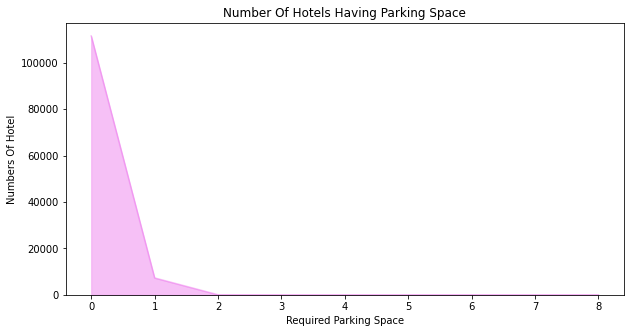

In [187]:
#area plot (carparking_space)
df_carparking_space.plot(kind='area',alpha=0.5,figsize=(10,5), color=['violet','indigo','Blue'])
plt.xlabel('Required Parking Space')
plt.ylabel("Numbers Of Hotel")
plt.title('Number Of Hotels Having Parking Space')
